##Question 1

(a) Generate a basic sinusoidal signal in the time domain. (For example, generate a sine wave with a frequency of 5 Hz, sampled at 1000 Hz.)

(b) Plot the time-domain waveform of the signal.

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Parameters
# -----------------------
fs = 1000        # Sampling frequency (Hz)
f = 5            # Signal frequency (Hz)
T = 1            # Duration in seconds
N = fs * T       # Total samples
t = np.linspace(0, T, N, endpoint=False)  # Time vector

 (a) Generate Sinusoidal Signal


In [ ]:
signal = np.sin(2 * np.pi * f * t)

(b) Plot Time-Domain Signal

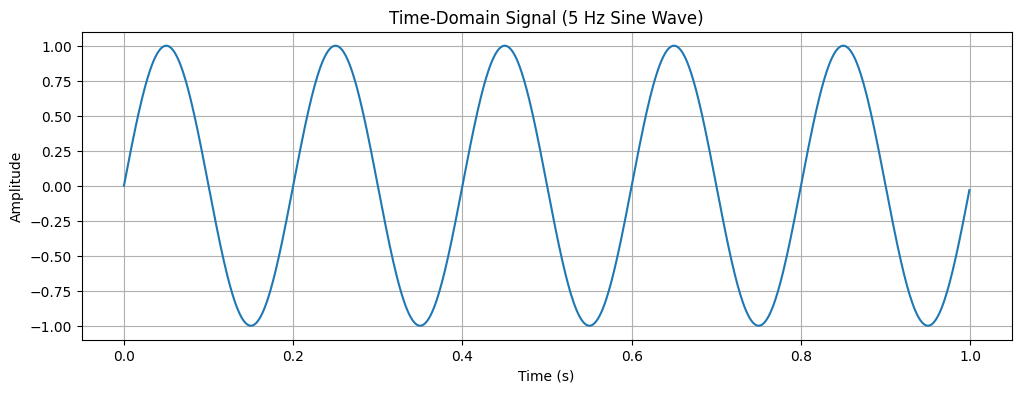

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.title("Time-Domain Signal (5 Hz Sine Wave)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

(c) Compute DTFT (Continuous Frequency Spectrum)

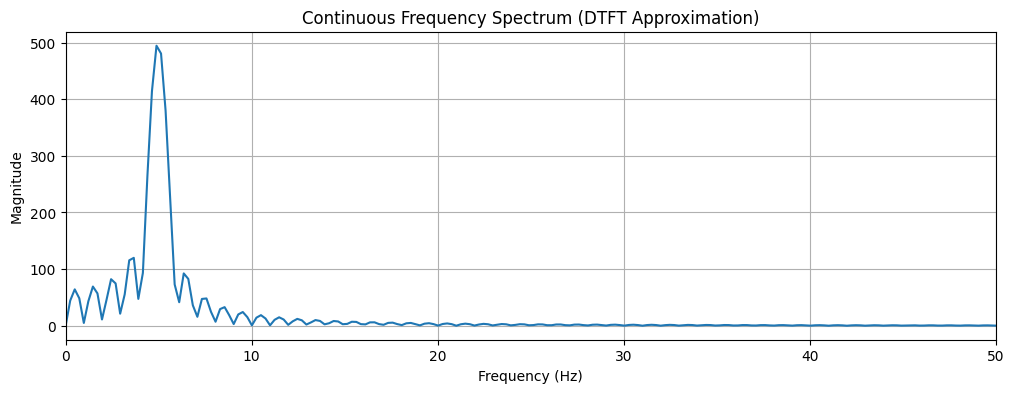

In [ ]:
# DTFT using FFT with high zero-padding for smooth curve
n_fft = 4096
dtft_spectrum = np.fft.fft(signal, n=n_fft)
freq_dtft = np.linspace(0, fs, n_fft)

plt.figure(figsize=(12, 4))
plt.plot(freq_dtft, np.abs(dtft_spectrum))
plt.title("Continuous Frequency Spectrum (DTFT Approximation)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(0, 50)  # Zoom near low frequencies
plt.show()

(d) Compute DFT (Discrete Spectrum)

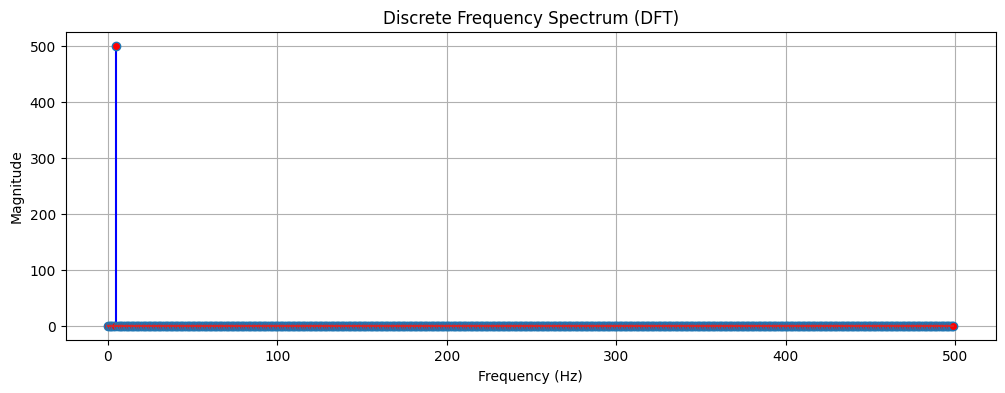

In [ ]:
dft_spectrum = np.fft.fft(signal)
freq_dft = np.fft.fftfreq(len(dft_spectrum), 1/fs)

plt.figure(figsize=(12, 4))
markerline, stemlines, baseline = plt.stem(freq_dft[:len(freq_dft)//2], np.abs(dft_spectrum[:len(dft_spectrum)//2]))
plt.setp(markerline, 'markerfacecolor', 'r')  # Change marker color
plt.setp(stemlines, 'color', 'b')             # Change stem color
plt.title("Discrete Frequency Spectrum (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


Windowing (Hamming Window)

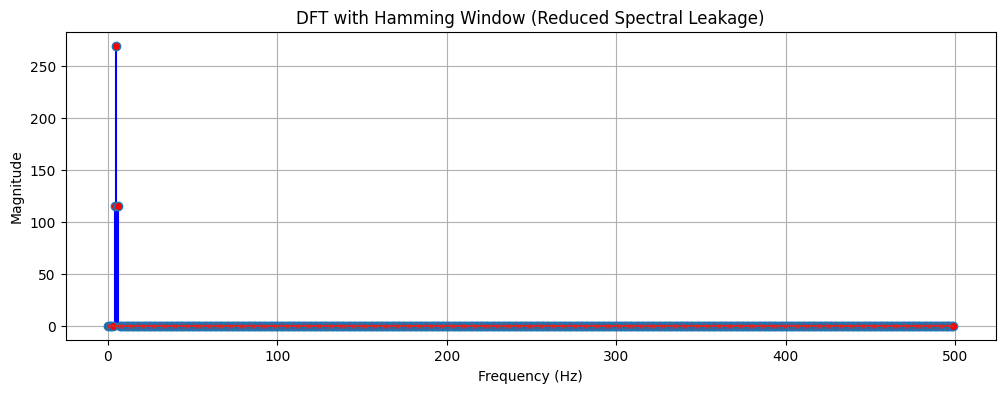

In [ ]:
window = np.hamming(N)
windowed_signal = signal * window
windowed_spectrum = np.fft.fft(windowed_signal)

plt.figure(figsize=(12, 4))
markerline, stemlines, baseline = plt.stem(freq_dft[:len(freq_dft)//2], np.abs(windowed_spectrum[:len(windowed_spectrum)//2]))
plt.setp(markerline, 'markerfacecolor', 'r')  # Red markers
plt.setp(stemlines, 'color', 'b')             # Blue stems
plt.title("DFT with Hamming Window (Reduced Spectral Leakage)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

##Question 2
(a) Generate a composite signal by adding two or more sinusoidal signals of different frequencies and amplitudes.

(b) Plot the time-domain waveform of the composite signal.

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Parameters
# -----------------------
fs = 1000        # Sampling frequency (Hz)
T = 1            # Duration in seconds
N = fs * T       # Total samples
t = np.linspace(0, T, N, endpoint=False)  # Time vector

(a) Generate Composite Signal (with noise)

In [ ]:
f1, A1 = 5, 1.0   # Frequency & amplitude for first sine wave
f2, A2 = 20, 0.5  # Frequency & amplitude for second sine wave
f3, A3 = 50, 0.3  # Frequency & amplitude for third sine wave

# Composite signal with noise
signal = A1*np.sin(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.sin(2*np.pi*f3*t)
noise = 0.2 * np.random.randn(N)  # Gaussian noise
composite_signal = signal + noise

(b) Plot Time-Domain Waveform

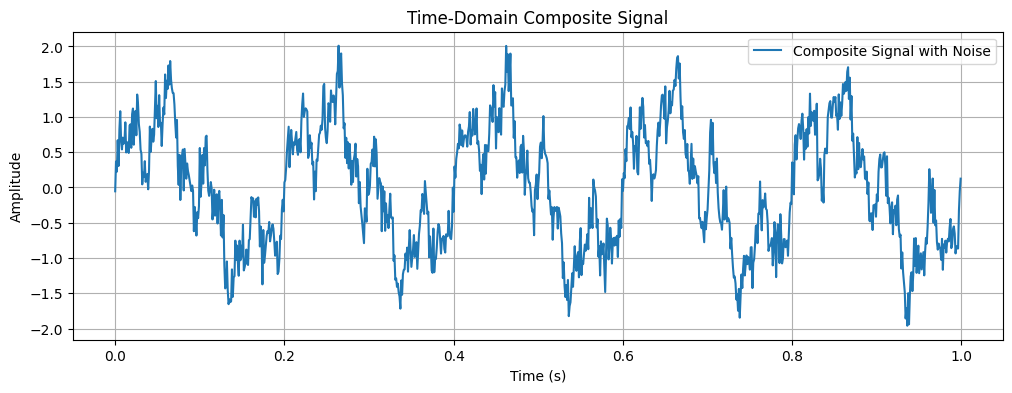

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(t, composite_signal, label="Composite Signal with Noise")
plt.title("Time-Domain Composite Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

(c) Compute DTFT (Continuous Spectrum)


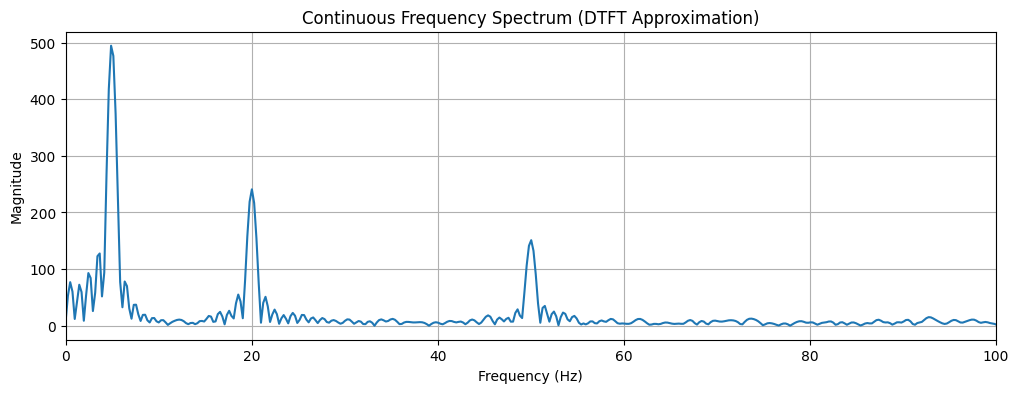

In [ ]:
n_fft = 4096
dtft_spectrum = np.fft.fft(composite_signal, n=n_fft)
freq_dtft = np.linspace(0, fs, n_fft)

plt.figure(figsize=(12, 4))
plt.plot(freq_dtft, np.abs(dtft_spectrum))
plt.title("Continuous Frequency Spectrum (DTFT Approximation)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(0, 100)  # Zoom on low frequencies
plt.show()

(d) Compute DFT (Discrete Spectrum)

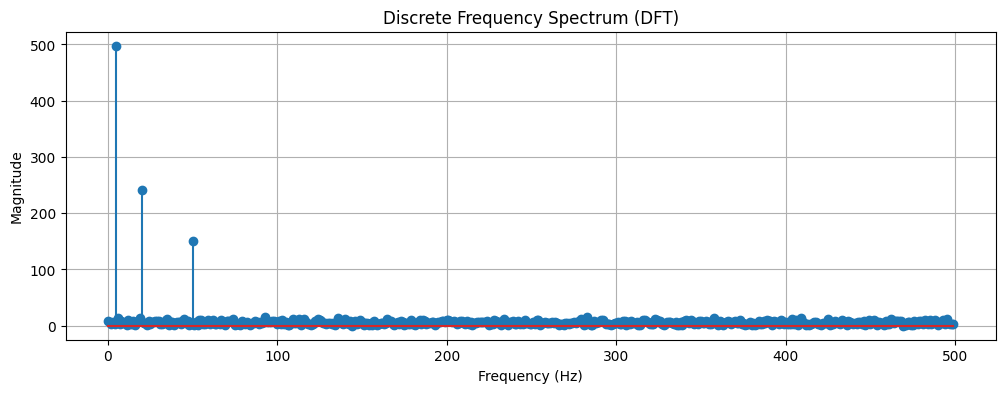

In [ ]:
dft_spectrum = np.fft.fft(composite_signal)
freq_dft = np.fft.fftfreq(len(dft_spectrum), 1/fs)

plt.figure(figsize=(12, 4))
plt.stem(freq_dft[:len(freq_dft)//2], np.abs(dft_spectrum[:len(dft_spectrum)//2]))
plt.title("Discrete Frequency Spectrum (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

Hamming Window to Reduce Spectral Leakage

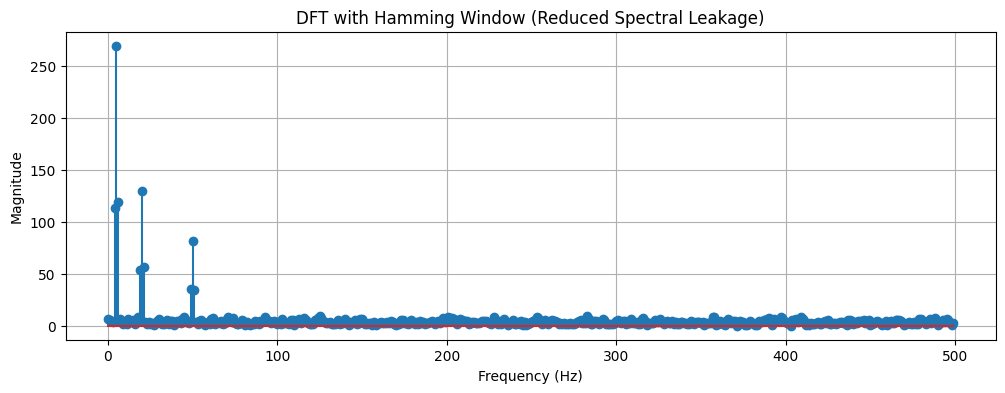

In [ ]:
window = np.hamming(N)
windowed_signal = composite_signal * window
windowed_spectrum = np.fft.fft(windowed_signal)

plt.figure(figsize=(12, 4))
plt.stem(freq_dft[:len(freq_dft)//2], np.abs(windowed_spectrum[:len(windowed_spectrum)//2]))
plt.title("DFT with Hamming Window (Reduced Spectral Leakage)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

## Question 3

(a) Generate an exponentially decaying signal.

(b) Plot the time-domain waveform.

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

(e) Analyze the relationship between the time-domain waveform and the frequency-domain representation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Parameters
# -----------------------
fs = 1000          # Sampling frequency (Hz)
T = 1              # Duration in seconds
N = fs * T         # Number of samples
t = np.linspace(0, T, N, endpoint=False)  # Time vector

(a) Generate Exponentially Decaying Signal with Noise

In [ ]:
decay_rate = 5
signal = np.exp(-decay_rate * t) * np.cos(2 * np.pi * 20 * t)  # decaying cosine
noise = 0.05 * np.random.randn(N)  # Add Gaussian noise
decay_signal = signal + noise

(b) Plot Time-Domain Waveform

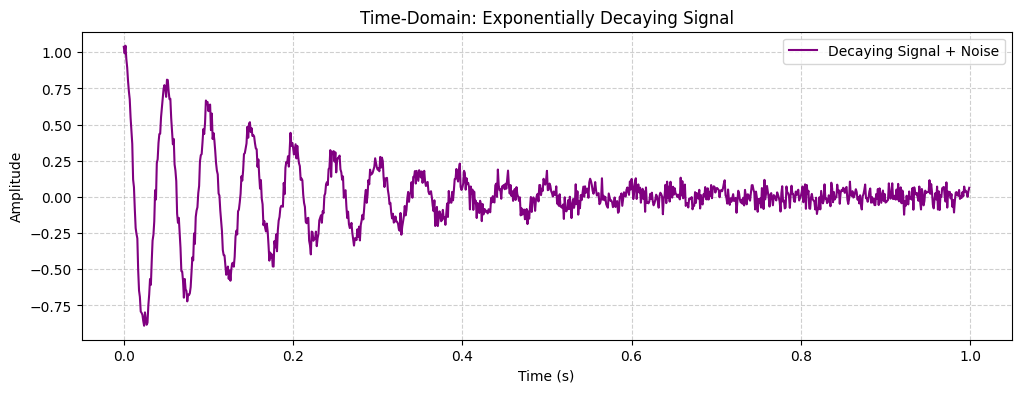

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(t, decay_signal, color='purple', linewidth=1.5, label='Decaying Signal + Noise')
plt.title("Time-Domain: Exponentially Decaying Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

(c) Compute DTFT (Continuous Spectrum with Zero-Padding)

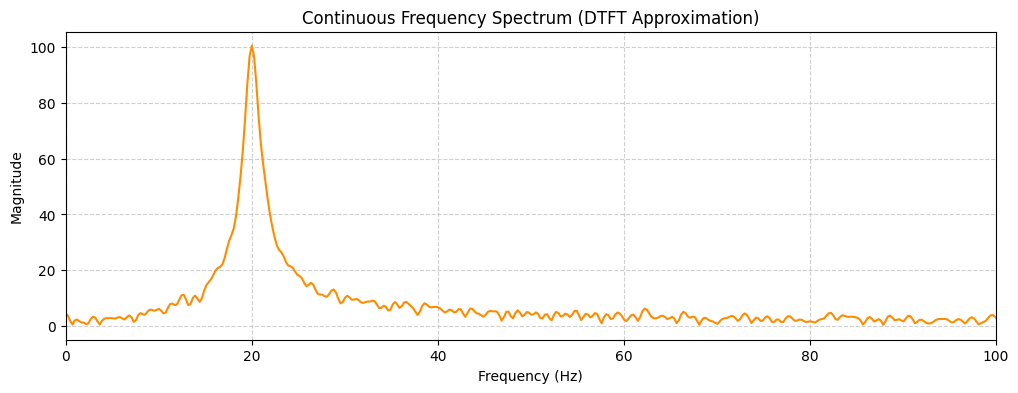

In [ ]:
n_fft = 4096
dtft_spectrum = np.fft.fft(decay_signal, n=n_fft)
freq_dtft = np.linspace(0, fs, n_fft)

plt.figure(figsize=(12, 4))
plt.plot(freq_dtft, np.abs(dtft_spectrum), color='darkorange', linewidth=1.5)
plt.title("Continuous Frequency Spectrum (DTFT Approximation)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 100)
plt.show()

(d) Compute DFT (Discrete Spectrum)

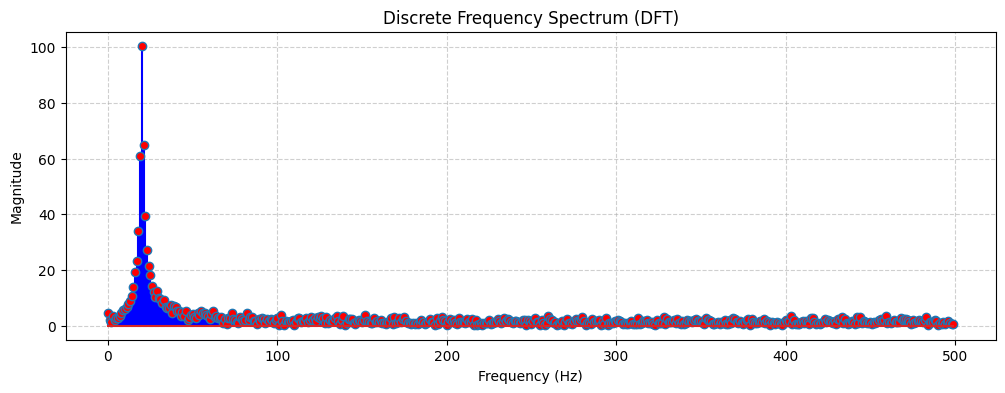

In [ ]:
dft_spectrum = np.fft.fft(decay_signal)
freq_dft = np.fft.fftfreq(len(dft_spectrum), 1/fs)

plt.figure(figsize=(12, 4))
markerline, stemlines, baseline = plt.stem(freq_dft[:len(freq_dft)//2],
                                           np.abs(dft_spectrum[:len(dft_spectrum)//2]))
plt.setp(markerline, 'markerfacecolor', 'red')
plt.setp(stemlines, 'color', 'blue')
plt.title("Discrete Frequency Spectrum (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Hamming Window for Spectral Leakage Reduction

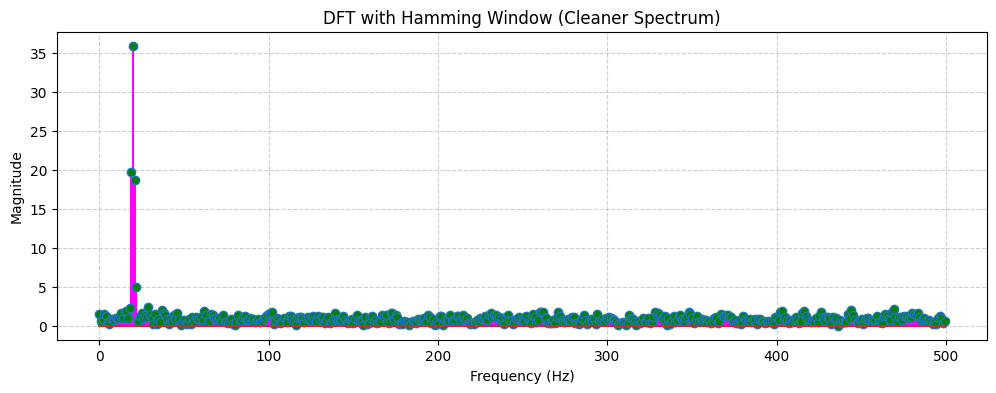

In [ ]:
window = np.hamming(N)
windowed_signal = decay_signal * window
windowed_spectrum = np.fft.fft(windowed_signal)

plt.figure(figsize=(12, 4))
markerline, stemlines, baseline = plt.stem(freq_dft[:len(freq_dft)//2],
                                           np.abs(windowed_spectrum[:len(windowed_spectrum)//2]))
plt.setp(markerline, 'markerfacecolor', 'green')
plt.setp(stemlines, 'color', 'magenta')
plt.title("DFT with Hamming Window (Cleaner Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

(e) Time vs Frequency Relationship

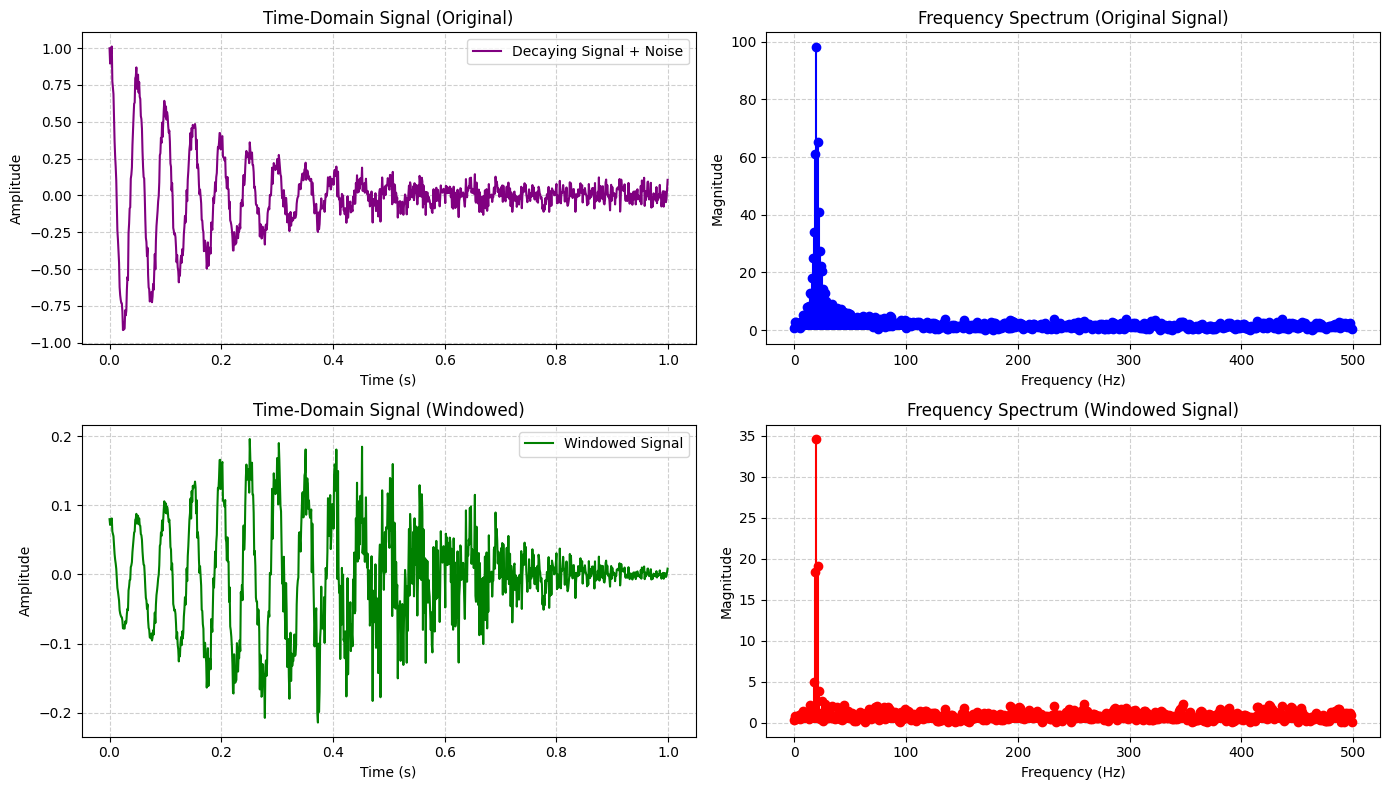

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# -----------------------
# Parameters
# -----------------------
fs = 1000          # Sampling frequency
T = 1              # Duration (seconds)
N = fs * T         # Number of samples
t = np.linspace(0, T, N, endpoint=False)
freq_dft = np.fft.fftfreq(N, 1/fs)   # Frequency vector for DFT

# -----------------------
# Decay rates for animation
# -----------------------
decay_rates = np.linspace(1, 10, 30)  # Vary decay rate from slow to fast

# -----------------------
# Figure Setup
# -----------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Time-domain plot
time_line, = axs[0].plot([], [], color='purple', lw=2)
axs[0].set_xlim(0, T)
axs[0].set_ylim(-1, 1)
axs[0].set_title("Time-Domain Signal")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True, linestyle="--", alpha=0.6)

# Frequency-domain plot
freq_line, = axs[1].plot([], [], color='orange', lw=2)
axs[1].set_xlim(0, 100)
axs[1].set_ylim(0, 500)
axs[1].set_title("Frequency Spectrum (DFT)")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Magnitude")
axs[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()

## Question 4
(a) Generate a rectangular pulse signal of finite duration in the time domain.

(b) Plot the time-domain waveform.

(c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum.

(d) Compute the Discrete Fourier Transform (DFT) and plot the discrete frequency spectrum.

(e) Analyze the relationship between the time-domain waveform and the frequency-domain representation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Parameters
# -----------------------
fs = 1000            # Sampling frequency (samples per second)
T = 1                # Total duration in seconds
N = fs * T           # Total number of samples
t = np.linspace(0, T, N, endpoint=False)  # Time vector

# Rectangular pulse parameters
pulse_width = 0.2    # Pulse width in seconds
pulse_amplitude = 1  # Amplitude of the pulse

(a) Generate Rectangular Pulse

In [ ]:
rect_pulse = np.where((t >= 0) & (t <= pulse_width), pulse_amplitude, 0)

(b) Time-Domain Plot

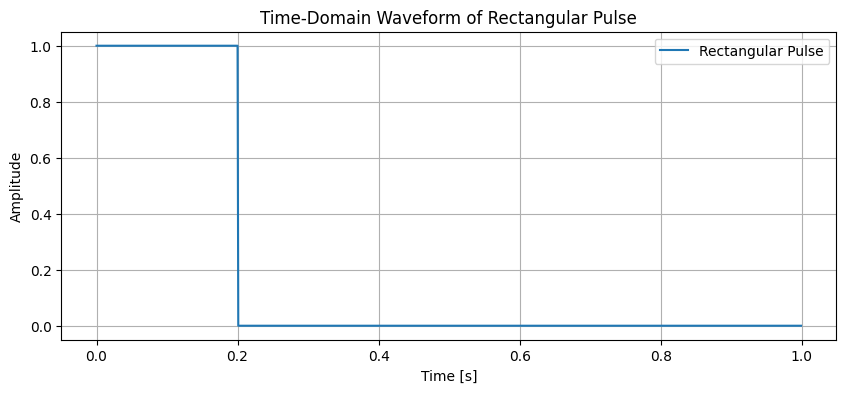

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(t, rect_pulse, label="Rectangular Pulse")
plt.title("Time-Domain Waveform of Rectangular Pulse")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

(c) DTFT - Continuous Frequency Spectrum

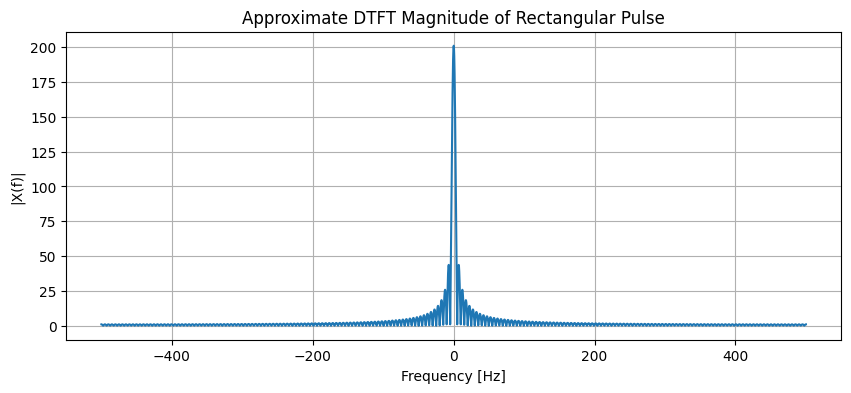

In [ ]:
# Use large zero-padded FFT to approximate continuous DTFT
freq_cont = np.linspace(-fs/2, fs/2, 8*N)  # Fine frequency resolution
X_dtft = np.fft.fftshift(np.fft.fft(rect_pulse, 8*N))  # Zero-padded FFT
X_dtft_mag = np.abs(X_dtft)

plt.figure(figsize=(10,4))
plt.plot(freq_cont, X_dtft_mag)
plt.title("Approximate DTFT Magnitude of Rectangular Pulse")
plt.xlabel("Frequency [Hz]")
plt.ylabel("|X(f)|")
plt.grid(True)
plt.show()

(d) DFT - Discrete Frequency Spectrum

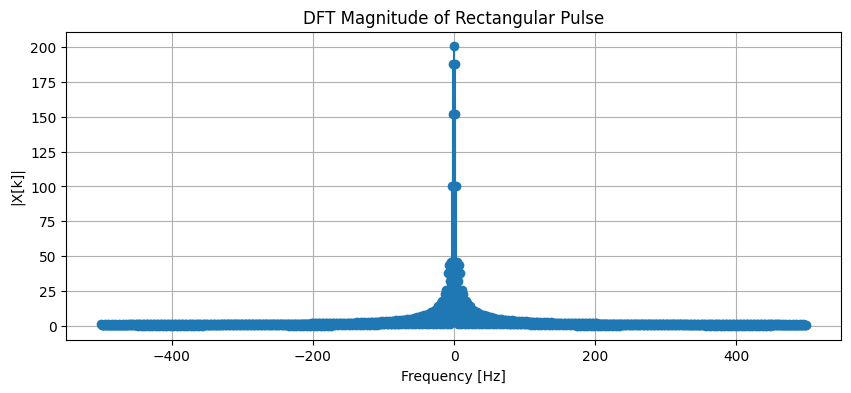

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# DFT of rectangular pulse
X_dft = np.fft.fft(rect_pulse)
freq_dft = np.fft.fftfreq(N, 1/fs)
X_dft_shifted = np.fft.fftshift(X_dft)
freq_dft_shifted = np.fft.fftshift(freq_dft)

plt.figure(figsize=(10,4))
plt.stem(freq_dft_shifted, np.abs(X_dft_shifted), basefmt=" ")  # Removed use_line_collection
plt.title("DFT Magnitude of Rectangular Pulse")
plt.xlabel("Frequency [Hz]")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

(e) Analysis

In [ ]:
print("Time-domain width of pulse:", pulse_width, "seconds")
print("Frequency-domain main lobe width (approx):", 2/pulse_width, "Hz")

Time-domain width of pulse: 0.2 seconds
Frequency-domain main lobe width (approx): 10.0 Hz


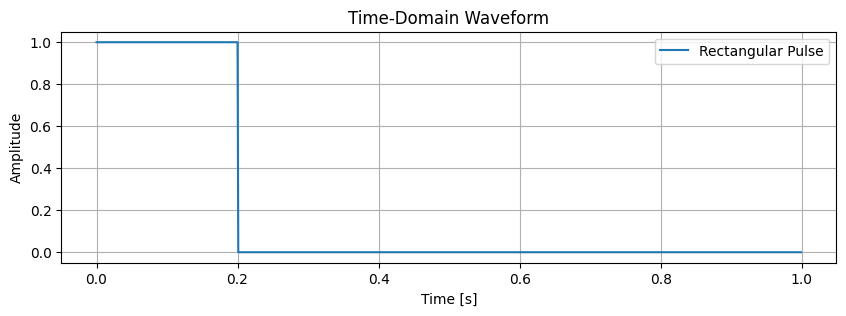

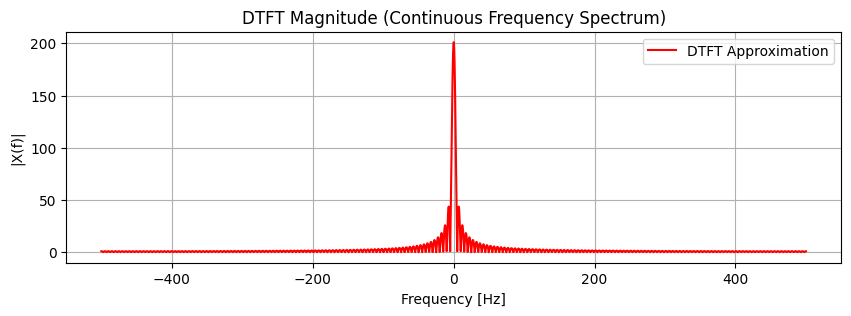

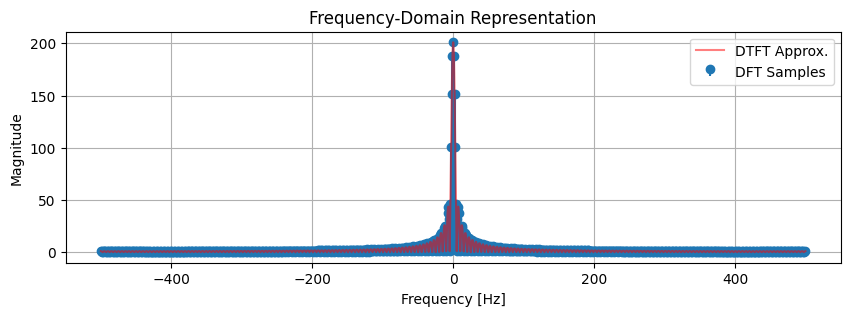

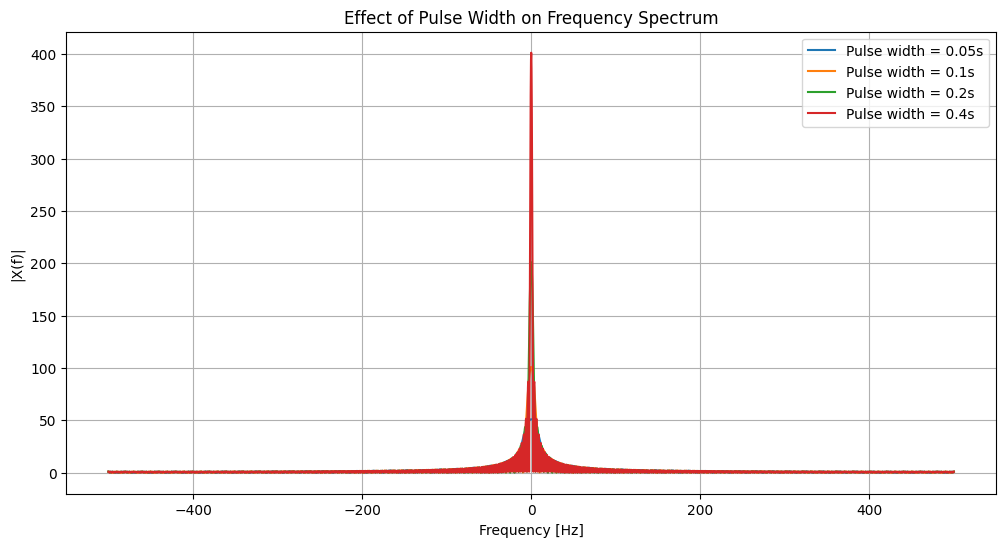

Observations:
1. Narrower pulse in time → wider frequency spectrum (main lobe expands).
2. Wider pulse in time → narrower frequency spectrum (main lobe contracts).
3. DTFT shows smooth sinc-like pattern; DFT samples discrete points of the spectrum.
4. Time-domain and frequency-domain are inversely related (time-frequency duality).
5. Main lobe width approximately ~ 2/pulse_width (Hz).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Parameters
# -----------------------
fs = 1000          # Sampling frequency (Hz)
T = 1              # Duration (seconds)
N = fs * T
t = np.linspace(0, T, N, endpoint=False)

# Rectangular pulse
pulse_width = 0.2
rect_pulse = np.where((t >= 0) & (t <= pulse_width), 1, 0)

# -----------------------
# Time-Domain Plot
# -----------------------
plt.figure(figsize=(10,3))
plt.plot(t, rect_pulse, label='Rectangular Pulse')
plt.title("Time-Domain Waveform")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------
# Frequency-Domain (DTFT Approximation)
# -----------------------
freq_cont = np.linspace(-fs/2, fs/2, 8*N)
X_dtft = np.fft.fftshift(np.fft.fft(rect_pulse, 8*N))
X_dtft_mag = np.abs(X_dtft)

plt.figure(figsize=(10,3))
plt.plot(freq_cont, X_dtft_mag, label='DTFT Approximation', color='r')
plt.title("DTFT Magnitude (Continuous Frequency Spectrum)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("|X(f)|")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------
# Frequency-Domain (DFT)
# -----------------------
X_dft = np.fft.fft(rect_pulse)
freq_dft = np.fft.fftfreq(N, 1/fs)
X_dft_shifted = np.fft.fftshift(X_dft)
freq_dft_shifted = np.fft.fftshift(freq_dft)

plt.figure(figsize=(10,3))
plt.stem(freq_dft_shifted, np.abs(X_dft_shifted), basefmt=" ", label='DFT Samples')
plt.plot(freq_cont, X_dtft_mag, color='r', alpha=0.5, label='DTFT Approx.')
plt.title("Frequency-Domain Representation")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------
# Visualizing Time-Frequency Duality
# -----------------------
pulse_widths = [0.05, 0.1, 0.2, 0.4]  # Different pulse widths
plt.figure(figsize=(12,6))

for i, pw in enumerate(pulse_widths):
    pulse = np.where((t >= 0) & (t <= pw), 1, 0)
    X = np.fft.fftshift(np.fft.fft(pulse, 8*N))
    plt.plot(freq_cont, np.abs(X), label=f'Pulse width = {pw}s')

plt.title("Effect of Pulse Width on Frequency Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("|X(f)|")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------
# Observations / Analysis
# -----------------------
print("Observations:")
print("1. Narrower pulse in time → wider frequency spectrum (main lobe expands).")
print("2. Wider pulse in time → narrower frequency spectrum (main lobe contracts).")
print("3. DTFT shows smooth sinc-like pattern; DFT samples discrete points of the spectrum.")
print("4. Time-domain and frequency-domain are inversely related (time-frequency duality).")
print("5. Main lobe width approximately ~ 2/pulse_width (Hz).")

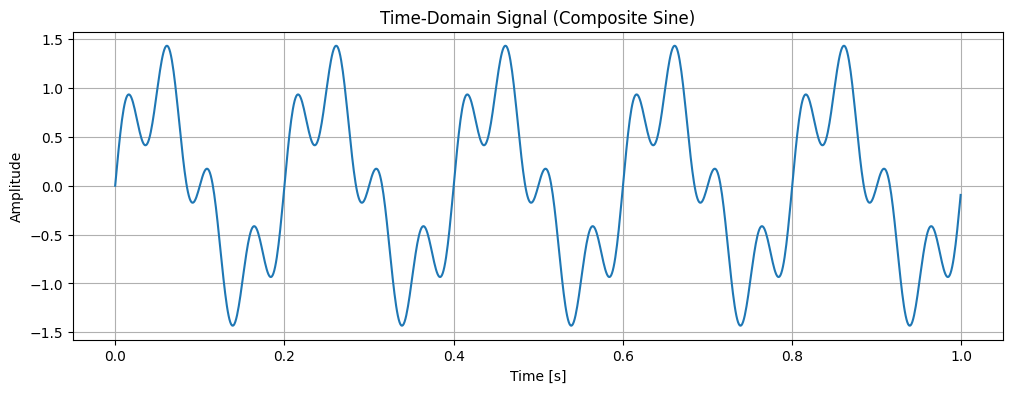

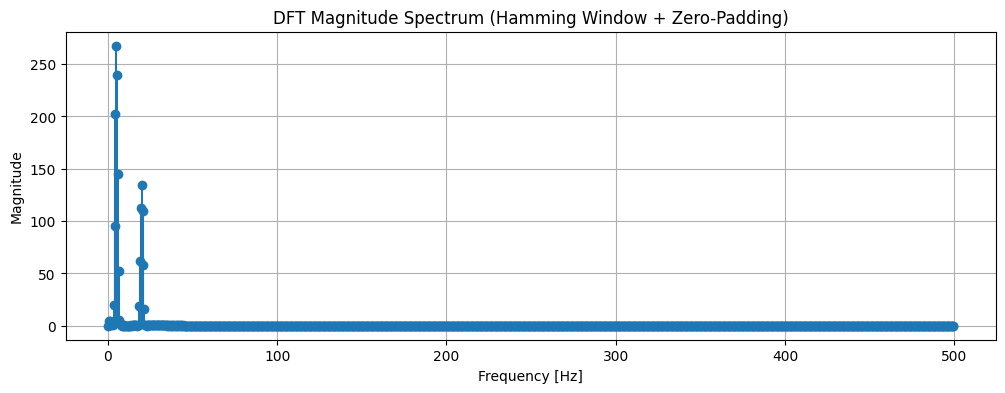

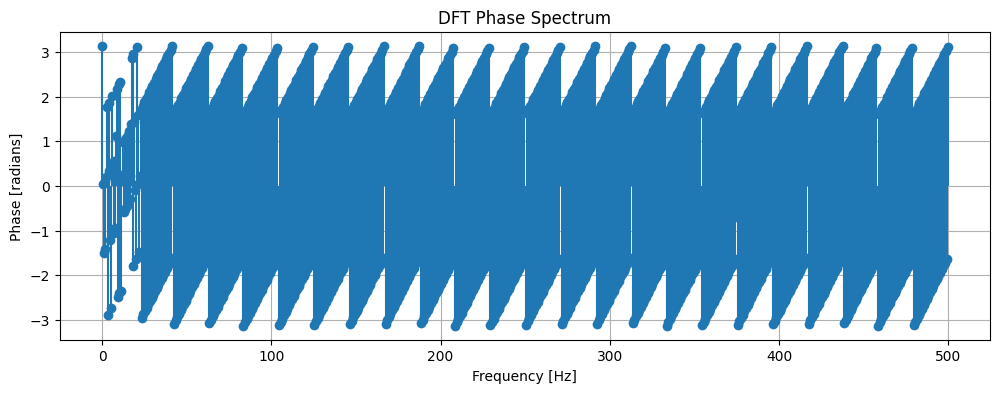

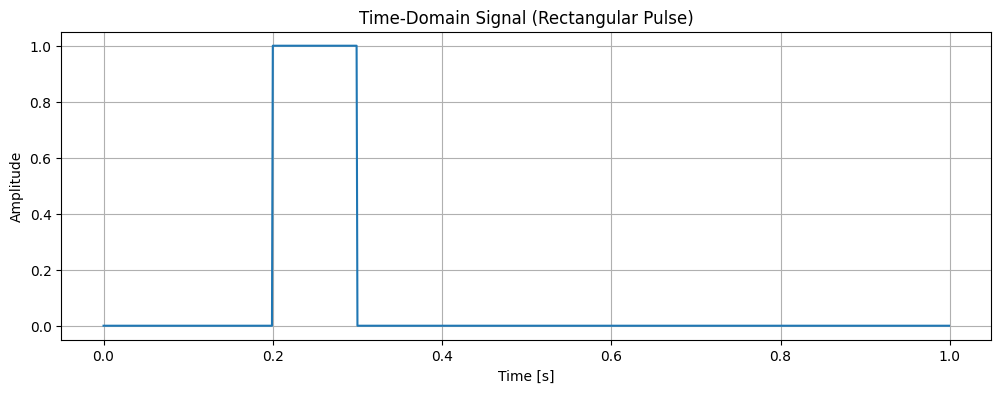

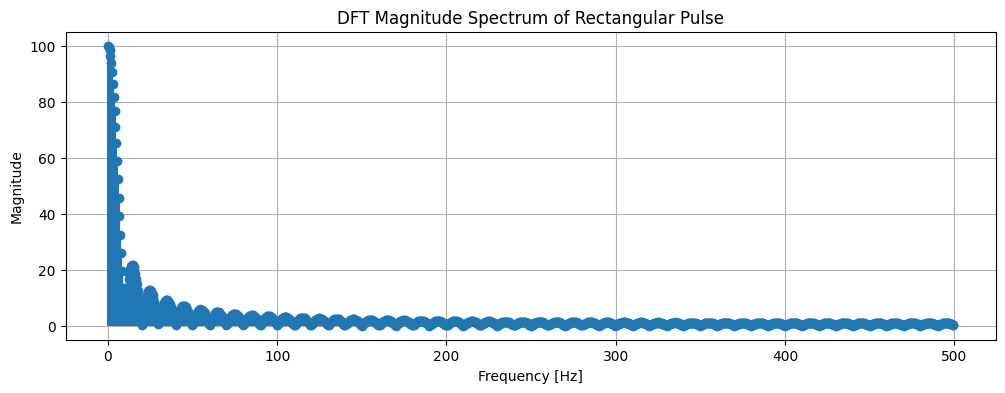

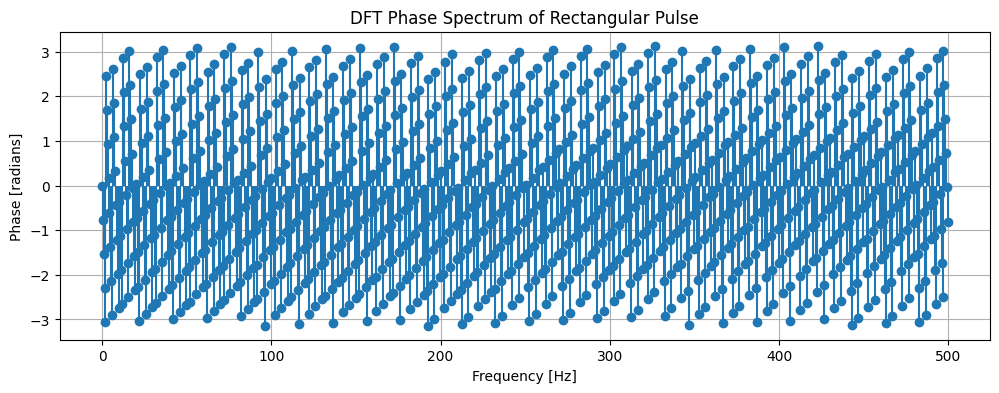

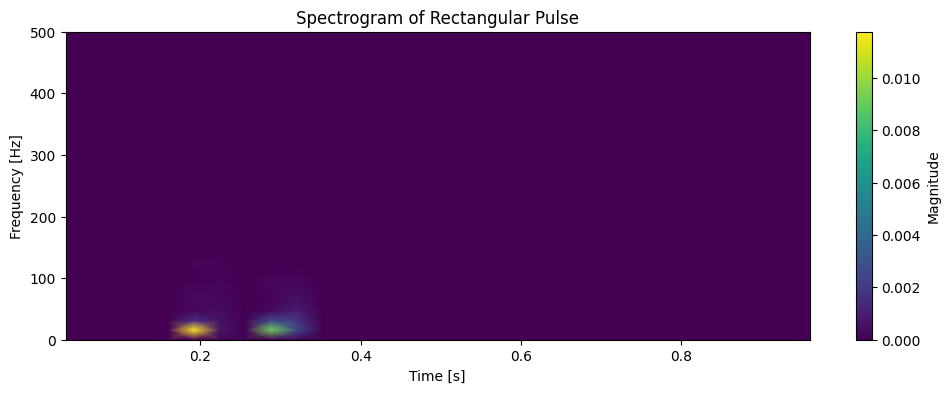

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows, spectrogram

# ----------------------
# Parameters
# ----------------------
fs = 1000         # Sampling frequency
T = 1             # Duration in seconds
t = np.linspace(0, T, fs*T, endpoint=False)

# ----------------------
# Example 1: Composite Sinusoidal Signal
# ----------------------
f1 = 5   # Hz
f2 = 20  # Hz
signal = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)

# Apply Hamming Window
window = windows.hamming(len(signal))
signal_windowed = signal * window

# Zero-padding for higher frequency resolution
N_fft = 2048
X_dft = np.fft.fft(signal_windowed, n=N_fft)
freq = np.fft.fftfreq(N_fft, 1/fs)

# ----------------------
# Time-Domain Plot
# ----------------------
plt.figure(figsize=(12,4))
plt.plot(t, signal)
plt.title("Time-Domain Signal (Composite Sine)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# ----------------------
# DFT Magnitude Spectrum
# ----------------------
plt.figure(figsize=(12,4))
plt.stem(freq[:N_fft//2], np.abs(X_dft[:N_fft//2]), basefmt=" ")
plt.title("DFT Magnitude Spectrum (Hamming Window + Zero-Padding)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# ----------------------
# DFT Phase Spectrum
# ----------------------
plt.figure(figsize=(12,4))
plt.stem(freq[:N_fft//2], np.angle(X_dft[:N_fft//2]), basefmt=" ")
plt.title("DFT Phase Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.grid(True)
plt.show()

# ----------------------
# Example 2: Rectangular Pulse
# ----------------------
rect_pulse = np.zeros_like(t)
rect_pulse[200:300] = 1  # rectangular pulse from t=0.2s to t=0.3s

# Time-Domain Plot
plt.figure(figsize=(12,4))
plt.plot(t, rect_pulse)
plt.title("Time-Domain Signal (Rectangular Pulse)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# DFT of Rectangular Pulse
X_rect = np.fft.fft(rect_pulse, n=N_fft)

plt.figure(figsize=(12,4))
plt.stem(freq[:N_fft//2], np.abs(X_rect[:N_fft//2]), basefmt=" ")
plt.title("DFT Magnitude Spectrum of Rectangular Pulse")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# Phase Spectrum of Rectangular Pulse
plt.figure(figsize=(12,4))
plt.stem(freq[:N_fft//2], np.angle(X_rect[:N_fft//2]), basefmt=" ")
plt.title("DFT Phase Spectrum of Rectangular Pulse")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.grid(True)
plt.show()

# ----------------------
# Spectrogram (STFT) of Rectangular Pulse
# ----------------------
f, tt, Sxx = spectrogram(rect_pulse, fs=fs, nperseg=64, noverlap=32)
plt.figure(figsize=(12,4))
plt.pcolormesh(tt, f, np.abs(Sxx), shading='gouraud')
plt.title("Spectrogram of Rectangular Pulse")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label='Magnitude')
plt.show()